In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DIRECT LINEAR TRANSFORMATION
Below function is the implementation of direct linear transformation for computing camera matrix given the world coordinates and their respective image coordinates.

In [2]:
import numpy as np

def direct_linear_trans(world_coord, img_coord, n):
  try:
    X = world_coord[:,0]
    Y = world_coord[:,1]
    Z = world_coord[:,2]
    u = img_coord[:,0]
    v = img_coord[:,1]
    P = np.ones((2*n,12))
    for i in range(0,n):
      P[2*i] =  [X[i], Y[i], Z[i], 1, 0, 0, 0, 0, -u[i]*X[i], -u[i]*Y[i], -u[i]*Z[i], -u[i]]
      P[2*i+1] =  [0, 0, 0, 0, X[i], Y[i], Z[i], 1, -v[i]*X[i], -v[i]*Y[i], -v[i]*Z[i], -v[i]]
    u, s, vh = np.linalg.svd(P)
    #print(vh.shape)
    #print(vh)
    Proj_mat = vh[11].reshape(3,4)
    KR = Proj_mat[:,0:3]
    _KRC = Proj_mat[:,3]
    Q, R = np.linalg.qr(np.linalg.inv(KR))
    K = np.linalg.inv(R)
    K = K/K[2,2]
    if(K[0][0]>0):
      K[0][0] *= -1
    Rot = Q.transpose()
    KR_inv = np.linalg.inv(KR)
    KR_inv *= -1
    T = np.dot(KR_inv , _KRC )
    return Proj_mat, K, T, Rot, True
  except:
    return None, None, None, None, False 


#MEAN SQUARE ERROR
Below function is used to calculate the mean square error between the manually observed image coordinates and image coordinated calculated using camera projection matrix.

In [3]:
def compute_MSE(world_coord, Proj_mat, img_coord):
  hom_world_coord = []
  i=0
  for pt in world_coord:
    hom_world_coord.append([pt[0],pt[1],pt[2],1])
    #print(hom_world_coord[i])
    #i+=1
  hom_world_coord = np.array(hom_world_coord)
  #print(hom_world_coord)
  mse = 0.0
  i=0
  for pt in hom_world_coord:
    img_pt = np.dot(Proj_mat, pt)
    img_pt[0]=img_pt[0]/img_pt[2]
    img_pt[1]=img_pt[1]/img_pt[2]
    mse += np.sqrt((img_coord[i][0]-img_pt[0])**2 + (img_coord[i][1]-img_pt[1])**2)
    #print(round(img_pt[0]), round(img_pt[1]), img_coord[i])
    i+=1
  return mse

#CAMERA CALLIBRATION
The image and world coordinates used are manually observed. Checkbox is taken to be of scale 28x28. Image coordinates are basically the pixel position of corners.

In [6]:
M = np.ones((12,12))

world_coord = np.array([[0, 0, 28],
              [0, 0, 84],
              [28, 0, 0],
              [84, 0, 0],
              [28, 28, 0],
              [168, 28, 0],
              [0, 0, 0],
              [56, 56, 0],
              [140, 0, 0],
              [0, 28, 28],
              [0, 56, 56],
              [56, 0, 0],
              [0, 0, 56],
              [28, 224, 0],
              [56, 224, 0],
              [84, 224, 0],
              [0, 196, 84],
              [0, 168, 140],
              [0, 140, 0],
              [196,28,0]])

img_coord = np.array([[1409, 1606],
                    [1134, 1640],
                    [1662, 1610],
                    [1932, 1644],
                    [1666, 1784],
                    [2412, 1917],
                    [1545, 1591],
                    [1789, 1983],
                    [2245, 1685],
                    [1412, 1781],
                    [1280, 1977],
                    [1794, 1627],
                    [1279, 1623],
                    [1658, 2903],
                    [1777, 2960],
                    [1905, 3021],
                    [1161, 2855],
                    [857, 2802],
                    [1545, 2399], 
                    [2599, 1949]])


print("FOR 28 X 28mm scale")
Proj_mat, K, T, Rot, _ = direct_linear_trans(world_coord, img_coord, 20)
print("PROJECTION MATRIX : \n",Proj_mat)
print()
print(K)
print()
print("translation vector : \n",T)
print()
print("ROTATION MATRIX : \n",Rot)
print()
mse = compute_MSE(world_coord, Proj_mat, img_coord)
print("CUMULATIVE MEAN SQUARE ERROR : ",mse)
print("\n---------------------------------------------\n")
print("FOR 2800 X 2800mm scale")
Proj_mat_2, K_2, T_2, Rot_2, _ = direct_linear_trans(world_coord, img_coord, 20)
print("PROJECTION MATRIX : \n",Proj_mat_2)
print()
print(K_2)
print()
print("translation vector : \n",T_2)
print()
print("ROTATION MATRIX : \n",Rot_2)
print()
mse = compute_MSE(world_coord*100, Proj_mat, img_coord)
print("CUMULATIVE MEAN SQUARE ERROR : ",mse)



FOR 28 X 28mm scale
PROJECTION MATRIX : 
 [[ 1.08705782e-03  2.54977186e-04 -2.78833812e-03  6.95493439e-01]
 [-5.87153430e-04  2.98849545e-03 -5.84591121e-04  7.18519335e-01]
 [-5.26797446e-07  1.61152247e-07 -5.12468957e-07  4.51147055e-04]]

[[-3.66376509e+03  1.21994007e+01  1.58514696e+03]
 [ 0.00000000e+00  3.64393861e+03  1.92630130e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

translation vector : 
 [433.21779356 -74.82221821 411.48104009]

ROTATION MATRIX : 
 [[-0.69674911  0.00342397  0.71730673]
 [-0.15596734 -0.97678745 -0.14683484]
 [ 0.70015346 -0.21418347  0.68110982]]

CUMULATIVE MEAN SQUARE ERROR :  42.058681491536696

---------------------------------------------

FOR 2800 X 2800mm scale
PROJECTION MATRIX : 
 [[ 1.08705782e-03  2.54977186e-04 -2.78833812e-03  6.95493439e-01]
 [-5.87153430e-04  2.98849545e-03 -5.84591121e-04  7.18519335e-01]
 [-5.26797446e-07  1.61152247e-07 -5.12468957e-07  4.51147055e-04]]

[[-3.66376509e+03  1.21994007e+01  1.58514696e+0

### Does varying scale of world points matter?
On performing above experiment, it is observed that  on changing the scale of world point, the result of camera callibation stays the same. Like projection matrix, camera matrix stays the same.

#NORMALIZATION

In [ ]:
#NORMALIZING IMAGE COORDINATES
#print(img_coord[:,0])
import math
x_mean = np.mean(img_coord[:,0])
#print(x_mean)
y_mean = np.mean(img_coord[:,1])
#print(y_mean)
T_norm = np.zeros((3,3))
d = 0.0
for pt in img_coord:
  d += (pt[0]-x_mean)**2 + (pt[1]-y_mean)**2
d = (math.sqrt(d))/(20)
T_norm[0][0]=math.sqrt(2)/d
T_norm[1][1]=math.sqrt(2)/d
T_norm[0][2]=-x_mean*math.sqrt(2)/d
T_norm[1][2]=-y_mean*math.sqrt(2)/d
T_norm[2][2]=1
#print(T_norm)

#NORMALIZING WORLD COORDINATES
X_mean = np.mean(world_coord[:,0])
#print(X_mean)
Y_mean = np.mean(world_coord[:,1])
#print(Y_mean)
Z_mean = np.mean(world_coord[:,2])
#print(Z_mean)
U_norm = np.zeros((4,4))
d = 0.0
for pt in world_coord:
  d += (pt[0]-X_mean)**2 + (pt[1]-Y_mean)**2 + (pt[2]-Z_mean)**2
d = (math.sqrt(d))/(20)
U_norm[0][0]=math.sqrt(3)/d
U_norm[1][1]=math.sqrt(3)/d
U_norm[2][2]=math.sqrt(3)/d
U_norm[0][3]=-X_mean*math.sqrt(3)/d
U_norm[1][3]=-Y_mean*math.sqrt(3)/d
U_norm[2][3]=-Z_mean*math.sqrt(3)/d
U_norm[3][3]=1
#print(U_norm)

norm_img_coord = []
for pt in img_coord:
  pt = np.append(pt,1)
  norm_img_point = np.matmul(T_norm,pt)
  norm_img_coord.append(norm_img_point)
norm_img_coord = np.array(norm_img_coord)
#print(norm_img_coord)

norm_world_coord = []
for pt in world_coord:
  pt = np.append(pt,1)
  norm_world_point = np.matmul(U_norm,pt)
  norm_world_coord.append(norm_world_point)
norm_world_coord = np.array(norm_world_coord)
#print(norm_world_coord)
norm_Proj_mat, norm_K, norm_T, norm_Rot, _ = direct_linear_trans(norm_world_coord, norm_img_coord, 11)
print("PROJECTION MATRIX : ",norm_Proj_mat)
print()
print(norm_K)
print()
print("translation vector : ",norm_T)
print()
print("ROTATION MATRIX : ",norm_Rot)
print()
#RECONSTRUCTION USING NORMALIZED POINTS AND PROJECTION MATRIX
mse = compute_MSE(norm_world_coord, norm_Proj_mat, norm_img_coord)
print("CUMULATIVE MEAN SQUARE ERROR : ",mse)

PROJECTION MATRIX :  [[-0.38184935  0.00195388  0.3944679   0.11565278]
 [-0.09791364 -0.52809405 -0.08067815 -0.0975295 ]
 [ 0.010938   -0.00246656  0.00733556 -0.61687589]]

[[-40.34054391   0.2679409   -7.17325031]
 [  0.          40.48456335  -2.00644637]
 [  0.           0.           1.        ]]

translation vector :  [ 32.779735   -11.07358524  31.49281372]

ROTATION MATRIX :  [[-0.56035488 -0.02259189  0.82794445]
 [-0.14004338 -0.98265075 -0.12159503]
 [ 0.8163273  -0.1840845   0.5474693 ]]

CUMULATIVE MEAN SQUARE ERROR :  1.9238761379782479


#DENORMALIZATION

In [ ]:
T_norm_inv = np.linalg.inv(T_norm)
denorm_proj_mat = np.matmul(T_norm_inv, norm_Proj_mat)
denorm_proj_mat = np.matmul(denorm_proj_mat, U_norm)
print("Denormalized projection matrix : \n",denorm_proj_mat)
mse = compute_MSE(world_coord, denorm_proj_mat, img_coord)
print("CUMULATIVE MEAN SQUARE ERROR : ",mse)


Denormalized projection matrix : 
 [[-1.56309721e+00 -2.69288527e-01  3.75831383e+00 -1.00582950e+03]
 [ 8.50468992e-01 -4.25672572e+00  4.59447456e-01 -1.03821800e+03]
 [ 7.61129066e-04 -1.71637120e-04  5.10450648e-04 -6.52174179e-01]]
CUMULATIVE MEAN SQUARE ERROR :  204.27308675699467


On denormalizing the projection matrix and performing reconstruction using the denormalized projection matrix, obtained image points are still quite close to the original image points. However, the denormalized projection matrix is not exactly same as the original matrix.

In [ ]:
def check_correspondences(world_coord, Proj_mat, img_coord):
  hom_world_coord = []
  for pt in world_coord:
    hom_world_coord.append([pt[0],pt[1],pt[2],1])
  hom_world_coord = np.array(hom_world_coord)
  mse = 0.0
  count = 0
  i = 0
  for pt in hom_world_coord:
    img_pt = np.dot(Proj_mat, pt)
    img_pt[0]=img_pt[0]/img_pt[2]
    img_pt[1]=img_pt[1]/img_pt[2]
    img_pt = np.round_(img_pt)
    #print(img_pt, img_coord[i])
    if(abs(img_pt[0]-img_coord[i][0])<=5 and abs(img_pt[1]-img_coord[i][1])<=5):
      count += 1

    #if(img_pt[0]==img_coord[i][0] and img_pt[1]==img_coord[i][1]):
    #  count += 1
    #mse += np.sqrt((img_coord[i][0]-img_pt[0])**2 + (img_coord[i][1]-img_pt[1])**2)
    #print(img_pt[0], img_pt[1], img_coord[i])
    i+=1
  return count

#RANSAC
Given implementation of RANSAC has 50 iterations. In each iteration we have used 6 random points to perform camera calibration using the above used Direct Linear Transformation and Mean square error functions.

In [ ]:
import random
import copy
import math

def RANSAC(world_coord, img_coord, n):
  min_itr = math.inf
  #print(indices)
  MSE = math.inf
  percent_match = []
  iteration = []
  for i in range(0,100):
    sampled_world_coord = []
    sampled_img_coord = []
    indices = random.sample(range(0, n-1), 6)
    for idx in indices:
      sampled_world_coord.append(world_coord[idx])
      sampled_img_coord.append(img_coord[idx])
    sampled_world_coord = np.array(sampled_world_coord)
    sampled_img_coord = np.array(sampled_img_coord)
    #print(sampled_world_coord, type(sampled_world_coord))
    Projection_matrix = []
    Proj_mat, K, T, Rot, check = direct_linear_trans(sampled_world_coord, sampled_img_coord, 6)
    if(check == False):
      continue
    matches = check_correspondences(world_coord, Proj_mat, img_coord)
    iteration.append(i)
    percent_match.append((matches*100/n))
    print("RANSAC LOOP",i)
    print("% corresspondence = ", (matches*100/n))
    mse = compute_MSE(world_coord, Proj_mat, img_coord)
    print("MSE = ",mse)
    if(min_itr==math.inf and (matches*100/n)>=95):
      min_itr = i
    #if((matches*100/20)==100):
      #Projection_matrix = Proj_mat
      #print("------------------------------------------------")
      
    if(MSE > mse):
      MSE = mse
      result = copy.deepcopy(Proj_mat)
    print("-------------------")
  print("BEST MSE AFTER RUNNING RANSAC = ",MSE)
  #print(Projection_matrix)
  return percent_match, iteration, min_itr, Proj_mat

RANSAC LOOP 0
% corresspondence =  80.0
MSE =  57.640131037979735
-------------------
RANSAC LOOP 1
% corresspondence =  40.0
MSE =  389.74542956966434
-------------------
RANSAC LOOP 2
% corresspondence =  5.0
MSE =  10486.525340743674
-------------------
RANSAC LOOP 3
% corresspondence =  90.0
MSE =  64.82660164208967
-------------------
RANSAC LOOP 4
% corresspondence =  30.0
MSE =  6515.396256180421
-------------------
RANSAC LOOP 5
% corresspondence =  80.0
MSE =  105.37633162000749
-------------------
RANSAC LOOP 6
% corresspondence =  65.0
MSE =  140.87958688906838
-------------------
RANSAC LOOP 7
% corresspondence =  85.0
MSE =  76.78000997536228
-------------------
RANSAC LOOP 8
% corresspondence =  65.0
MSE =  3199.4990541904917
-------------------
RANSAC LOOP 9
% corresspondence =  75.0
MSE =  63.21375832339788
-------------------
RANSAC LOOP 10
% corresspondence =  60.0
MSE =  117.05474522656972
-------------------
RANSAC LOOP 11
% corresspondence =  20.0
MSE =  6503.84314

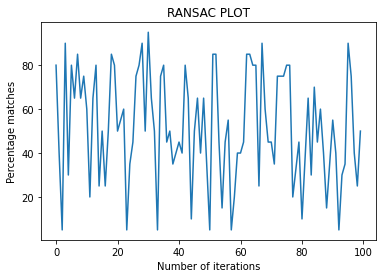

In [ ]:
import matplotlib.pyplot as plt 

y , x, min_itr, ransac_proj_mat = RANSAC(world_coord, img_coord, 20)
print("best projection mtrix obtained from ransac : \n",ransac_proj_mat)
if(min_itr != math.inf):
  print('Min iterations to get atleat 95% accuracy =',min_itr)
else:
  print('Could not get 95% accuracy')
plt.plot(x, y) 
plt.xlabel('Number of iterations') 
plt.ylabel('Percentage matches') 
plt.title('RANSAC PLOT') 
  
plt.show()

0.16872428154015673


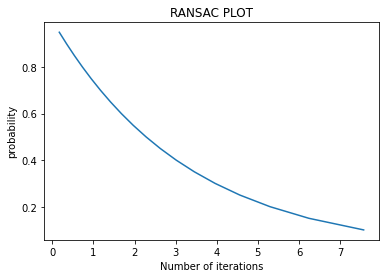

In [ ]:
import math
p = 0.95
e = 0.2
s = 6
no_of_trials = math.log(p)/(math.log(1-(1-e)**s))
print(no_of_trials)

probab = [.1, .15, .2, .25, .3, .35, .40, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95]
iterations = []
for p in probab:
  no_of_trials = math.log(p)/(math.log(1-(1-e)**s))
  iterations.append(no_of_trials)
plt.plot(iterations, probab) 
plt.xlabel('Number of iterations') 
plt.ylabel('probability') 
plt.title('RANSAC PLOT') 
  
plt.show()

#ZHANG'S METHOD FOR CAMERA CALIBRATION

In [ ]:
import cv2
world_coordinates = []
image_coordinates = []
world = []
for i in range(0,8):
    for j in range(0,6):
      world.append([np.float32(j*29), np.float32(i*29), 0])
world=np.array(world)
world = np.float32(world)
print(world.shape, type(world), type(world[0][0]))
#print(world)

for num in range(5456, 5471):
    img = cv2.imread('/content/drive/My Drive/COMPUTER VISION/CAMERA_CALLIBRATION/calibration-data/IMG_'+str(num)+'.JPG')
    ret, corners = cv2.findChessboardCorners(img,(6, 8))
    if ret is True:
        image_coordinates.append(corners)
        world_coordinates.append(world)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(world_coordinates, image_coordinates, (img.shape[1],img.shape[0]), None, None)
#print(np.shape(image_coordinates))
#print(np.shape(world_coordinates))
print("Camera Matrix : \n", mtx, "\n")
print("Reprojection error : ", ret, "\n")

#print(rvecs[0].shape)
#print(rvecs)
#print()
#print(tvecs[0].shape)
#print(tvecs)


(48, 3) <class 'numpy.ndarray'> <class 'numpy.float32'>
Camera Matrix : 
 [[1.36634814e+04 0.00000000e+00 3.33651179e+03]
 [0.00000000e+00 1.36813888e+04 1.49657922e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

Reprojection error :  2.481022249714264 



**Function to convert the Rotation Matrix into the Euler Angles**<br>
This function was provided already to us as a helper function in the assignment.

In [ ]:

def eulerAnglesToRotationMatrix(theta) :
    R_x = np.array([[1,0,0],[0,math.cos(theta[0]),-math.sin(theta[0])],[0,math.sin(theta[0]), math.cos(theta[0])]])
    R_y = np.array([[math.cos(theta[1]),0,math.sin(theta[1])],[0,1,0],[-math.sin(theta[1]),0,math.cos(theta[1])]])             
    R_z = np.array([[math.cos(theta[2]),-math.sin(theta[2]),0],[math.sin(theta[2]),math.cos(theta[2]),0],[0,0,1]])
    R = np.dot(R_z,np.dot(R_y,R_x))
    return R

### get_World_Points() FUNCTION
This function is used to generate world points


In [ ]:
def get_World_Points():
  world = []
  for i in range(0,8):
      for j in range(0,6):
        world.append([np.float32(j*29), np.float32(i*29), 0, 1])
  world=np.array(world)
  world = np.float32(world)
  #print(world.shape)
  #print(world)
  #print()
  return world

(48, 2)


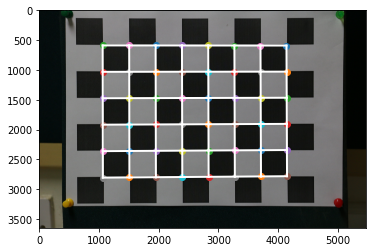

(48, 2)


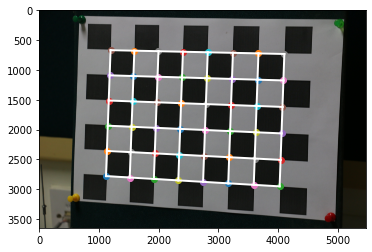

(48, 2)


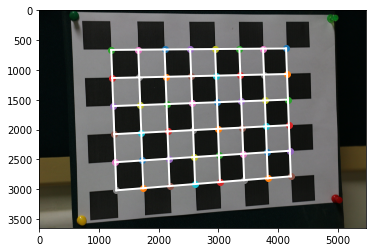

(48, 2)


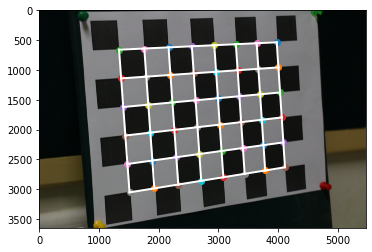

(48, 2)


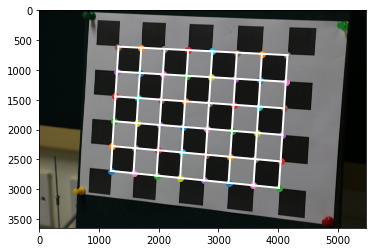

(48, 2)


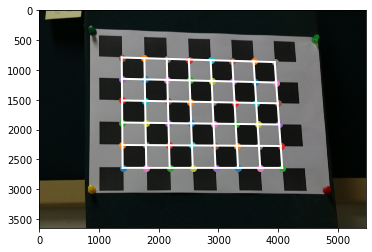

(48, 2)


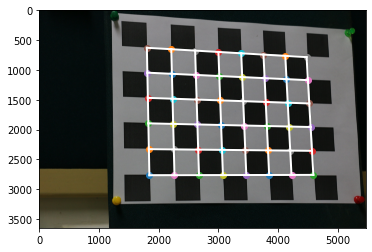

(48, 2)


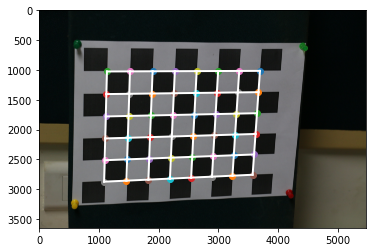

(48, 2)


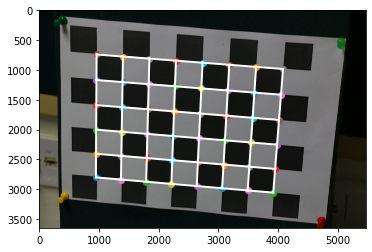

(48, 2)


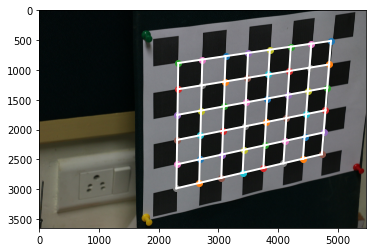

(48, 2)


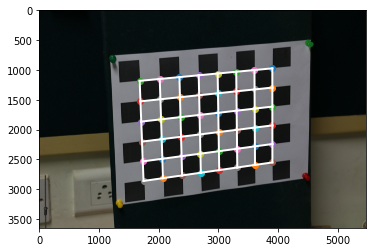

(48, 2)


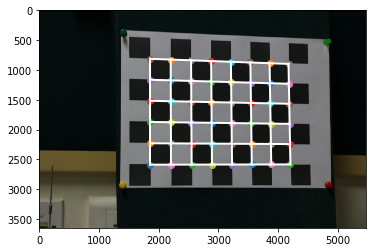

(48, 2)


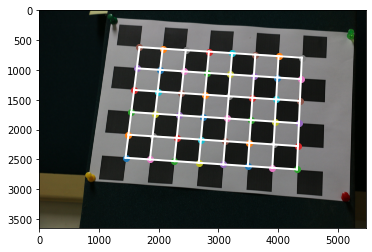

(48, 2)


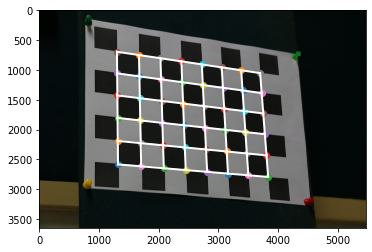

(48, 2)


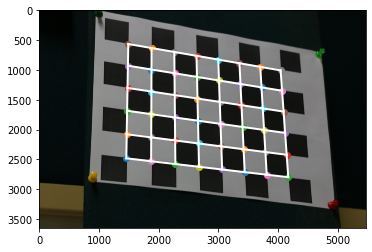

In [ ]:
import matplotlib.pyplot as plt

world = get_World_Points()

idx = 0
for num in range(5456, 5471):
    img = plt.imread('/content/drive/My Drive/COMPUTER VISION/CAMERA_CALLIBRATION/calibration-data/IMG_'+str(num)+'.JPG')
    rotation_mat = np.zeros(shape=(3, 3))
    R = cv2.Rodrigues(rvecs[idx], rotation_mat)[0]
    temp1 = np.zeros((3,4))
    temp1[0:3,0:3] = R[0:3,0:3]
    temp1[:,3] = tvecs[idx][:,0]
    P = np.matmul(mtx,temp1)
    P = P/P[2,3]

    projected_points = []
    for i in range(48):
        projection = np.matmul(P,np.transpose(world[i,:]))
        projection = projection/projection[2]
        projected_points.append(projection[0:2])
    projected_points = np.asarray(projected_points)
    idx += 1
    implot = plt.imshow(img)
    #plt.imshow(im)

    print(projected_points.shape)
    #LINE MAKING
    for i in range(0,47):
      #print(projected_points[i][0], projected_points[i][1])
      if(i%6 == 5):
        continue
      x = [projected_points[i][0], projected_points[i+1][0]]
      y = [projected_points[i][1], projected_points[i+1][1]]
      plt.plot(x, y, color="white", linewidth=2)
    for i in range(0,42):
      x = [projected_points[i][0], projected_points[i+6][0]]
      y = [projected_points[i][1], projected_points[i+6][1]]
      plt.plot(x, y, color="white", linewidth=2)

    # POINT PLOTTING
    for pt in projected_points:
      plt.scatter(pt[0], pt[1])
    plt.show()
    #print(projected_points)
    #print(projected_points.shape)
#print(world_points_1.shape)
#print(world_points_1)

**HANDS ON**<BR>
Below is taken from my old school Sony Experia C camera. Check boxes in the image are all 20mm x 20mm. Image has been manually drawn by me.

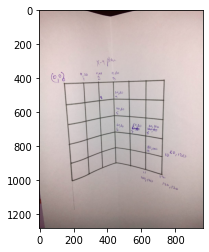

In [ ]:
img = plt.imread('/content/drive/My Drive/COMPUTER VISION/CAMERA_CALLIBRATION/calibration-data/my_img.jpeg')
plt.imshow(img)

In [ ]:
M = np.ones((12,12))

world_coord = np.array([[60,0 ,0 ],
                        [40,0 ,0 ],
                        [20,0 ,0 ],
                        [0,0 ,0 ],
                        [0,20 ,0 ],
                        [0,40 ,0 ],
                        [0,60, 0 ],
                        [0,60 ,20 ],
                        [0,60 ,40 ],
                        [0,80 ,40 ],
                        [0,80 ,60],
                        [0,100 ,40],
                        [0,100 ,60]])


img_coord = np.array([[150,432],
                      [261,429],
                      [349,426],
                      [435,423],
                      [438,524],
                      [441,620],
                      [445,717],
                      [523,725],
                      [624,740],
                      [625,840],
                      [721,861],
                      [624,936],
                      [719,964]])



Proj_mat, K, T, Rot, _ = direct_linear_trans(world_coord, img_coord, 11)
print("PROJECTION MATRIX : ",Proj_mat)
print()
print(K)
print()
print("translation vector : ",T)
print()
print("ROTATION MATRIX : ",Rot)
print()
mse = compute_MSE(world_coord, Proj_mat, img_coord)
print("CUMULATIVE MEAN SQUARE ERROR : ",mse)


PROJECTION MATRIX :  [[ 8.53403932e-03 -7.35797082e-04 -5.07862284e-03 -7.15819959e-01]
 [ 1.90845514e-03 -8.77328220e-03  1.94441704e-03 -6.98151496e-01]
 [ 4.96538614e-06 -1.04649348e-06  4.00403598e-06 -1.64859191e-03]]

[[-1.44028893e+03 -2.94990199e+01  5.45917838e+02]
 [ 0.00000000e+00  1.27251793e+03  6.32870397e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

translation vector :  [189.36436036   0.87288783 177.13082817]

ROTATION MATRIX :  [[-0.6224251   0.03786527  0.78176289]
 [-0.15002054 -0.98608089 -0.071682  ]
 [ 0.76816719 -0.16189717  0.61944207]]

CUMULATIVE MEAN SQUARE ERROR :  33.45338128250707


###Running RANSAC on the image taken by my phone's camera

In [ ]:
percent_match, iteration, min_itr, Proj_mat = RANSAC(world_coord, img_coord, 13)

RANSAC LOOP 0
% corresspondence =  69.23076923076923
MSE =  42.31117224552313
-------------------
RANSAC LOOP 1
% corresspondence =  15.384615384615385
MSE =  530.9968820442903
-------------------
RANSAC LOOP 2
% corresspondence =  46.15384615384615
MSE =  1034.4583815778306
-------------------
RANSAC LOOP 3
% corresspondence =  23.076923076923077
MSE =  483.37047369163827
-------------------
RANSAC LOOP 4
% corresspondence =  69.23076923076923
MSE =  341.7054456440596
-------------------
RANSAC LOOP 6
% corresspondence =  7.6923076923076925
MSE =  672.1167765062619
-------------------
RANSAC LOOP 7
% corresspondence =  15.384615384615385
MSE =  420.0090283880042
-------------------
RANSAC LOOP 8
% corresspondence =  15.384615384615385
MSE =  791.2238325169179
-------------------
RANSAC LOOP 9
% corresspondence =  76.92307692307692
MSE =  41.778302664572784
-------------------
RANSAC LOOP 10
% corresspondence =  46.15384615384615
MSE =  1003.8776166410873
-------------------
RANSAC LOO

In [ ]:
def get_my_world():
  my_world =[]
  for x in range(3,0,-1): 
    for y in range(0,6):
      #for z in range(0,4):
      my_world.append([20*x,20*y,0])
  for x in range(0,4): 
    for y in range(0,6):
      #for z in range(0,4):
      my_world.append([0,20*y,20*x])    
  #my_world = np.array(my_world)
  #my_world = np.float32(my_world)
  print(my_world)
  return my_world

## Function to reconstruct image points from world points of image taken from my phone camera

In [ ]:
def get_image_points(world_coord, Proj_mat):
  hom_world_coord = []
  projected_points = []
  for pt in world_coord:
    hom_world_coord.append([pt[0],pt[1],pt[2],1])
  hom_world_coord = np.array(hom_world_coord)
  mse = 0.0
  count = 0
  i = 0
  for pt in hom_world_coord:
    img_pt = np.dot(Proj_mat, pt)
    img_pt[0]=img_pt[0]/img_pt[2]
    img_pt[1]=img_pt[1]/img_pt[2]
    img_pt = np.round_(img_pt)
    #print(img_pt, img_coord[i])
    #if(img_pt[0]==img_coord[i][0] and img_pt[1]==img_coord[i][1]):
    #  count += 1
    projected_points.append([img_pt[0], img_pt[1]])
    i+=1
  return projected_points

In [ ]:
my_world = get_my_world()
#print(my_world, Proj_mat)
projected_points = get_image_points(my_world, Proj_mat)
#print(np.array(projected_points))

[[60, 0, 0], [60, 20, 0], [60, 40, 0], [60, 60, 0], [60, 80, 0], [60, 100, 0], [40, 0, 0], [40, 20, 0], [40, 40, 0], [40, 60, 0], [40, 80, 0], [40, 100, 0], [20, 0, 0], [20, 20, 0], [20, 40, 0], [20, 60, 0], [20, 80, 0], [20, 100, 0], [0, 0, 0], [0, 20, 0], [0, 40, 0], [0, 60, 0], [0, 80, 0], [0, 100, 0], [0, 0, 20], [0, 20, 20], [0, 40, 20], [0, 60, 20], [0, 80, 20], [0, 100, 20], [0, 0, 40], [0, 20, 40], [0, 40, 40], [0, 60, 40], [0, 80, 40], [0, 100, 40], [0, 0, 60], [0, 20, 60], [0, 40, 60], [0, 60, 60], [0, 80, 60], [0, 100, 60]]


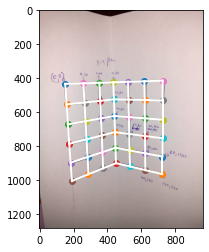

In [ ]:
import matplotlib.pyplot as plt

world = get_World_Points()

img = plt.imread('/content/drive/My Drive/COMPUTER VISION/CAMERA_CALLIBRATION/calibration-data/my_img.jpeg')
    
#idx += 1
implot = plt.imshow(img)

#LINE MAKING
for i in range(0,41):
  if(i%6 == 5):
    continue
  x = [projected_points[i][0], projected_points[i+1][0]]
  y = [projected_points[i][1], projected_points[i+1][1]]
  plt.plot(x, y, color="white", linewidth=2)

for i in range(0,36):
  x = [projected_points[i][0], projected_points[i+6][0]]
  y = [projected_points[i][1], projected_points[i+6][1]]
  plt.plot(x, y, color="white", linewidth=2)

# POINT PLOTTING
for pt in projected_points:
  plt.scatter(pt[0], pt[1])
plt.show()
